In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('lung cancer survey.csv')
print(data.shape)
data.head(100)



(309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,60,1,2,2,2,1,2,1,1,1,1,1,2,2,YES
96,F,61,2,2,2,1,1,1,2,1,2,2,2,1,2,YES
97,M,59,2,1,1,2,1,1,1,1,2,2,2,1,1,YES
98,M,64,1,2,2,2,1,2,2,1,1,2,1,2,1,YES


In [4]:

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
gender = data['GENDER']
result = label.fit_transform(gender)
data['GENDER'] = result
data.GENDER

0      1
1      1
2      0
3      1
4      0
      ..
304    0
305    1
306    1
307    1
308    1
Name: GENDER, Length: 309, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
have_cancer = data['LUNG_CANCER']
result = label.fit_transform(have_cancer)
data['LUNG_CANCER'] = result
data.LUNG_CANCER


0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [6]:
all_attributes = list(data)
need_excluded_attributes = ['AGE', 'GENDER', 'CHRONIC DISEASE', 'SHORTNESS OF BREATH']


def remove_attr(items_to_remove):
    all_attributes = list(data)
    for remove_item in items_to_remove:
        all_attributes.remove(remove_item)

    return all_attributes


new_all_attributes = remove_attr(need_excluded_attributes)
new_all_attributes.remove('LUNG_CANCER')

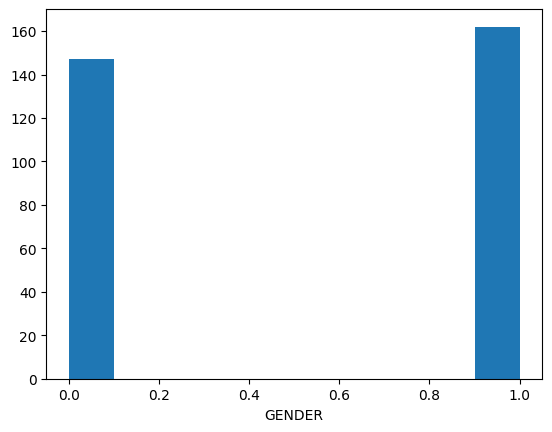

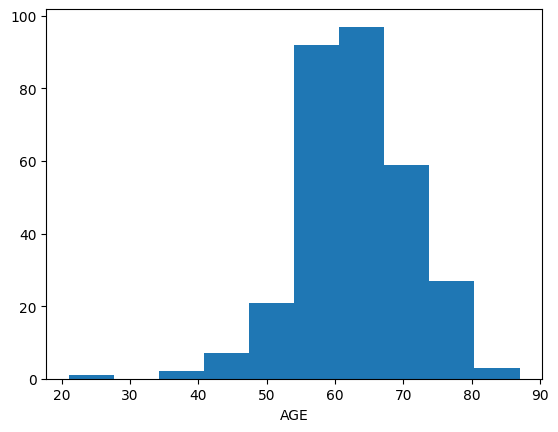

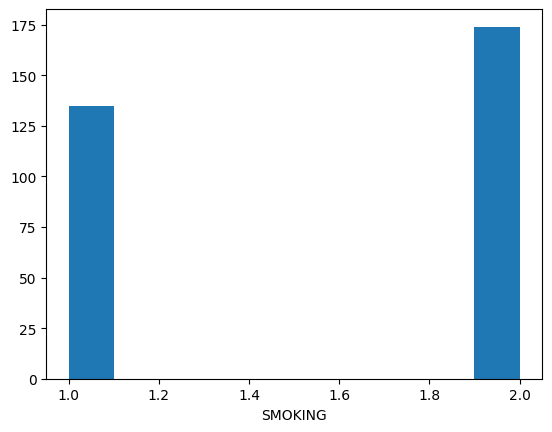

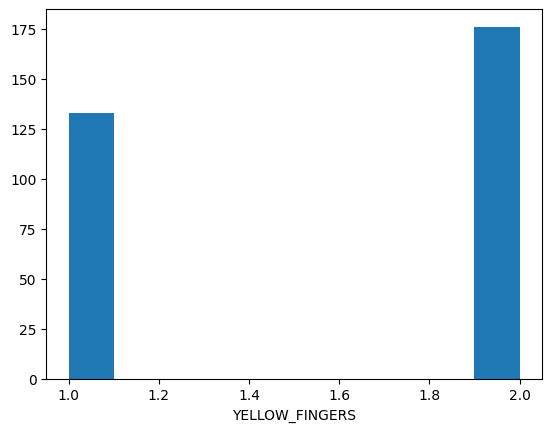

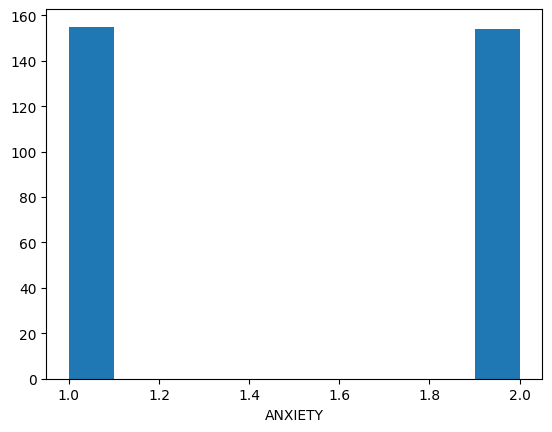

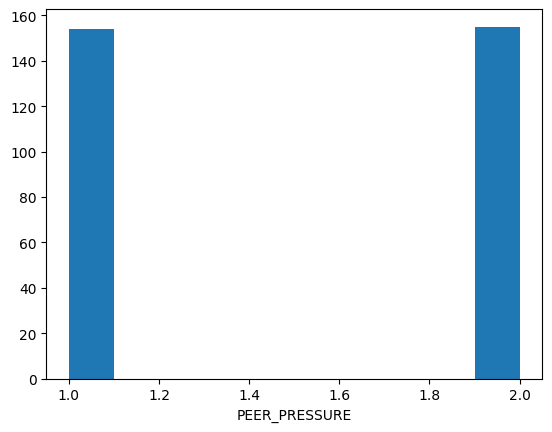

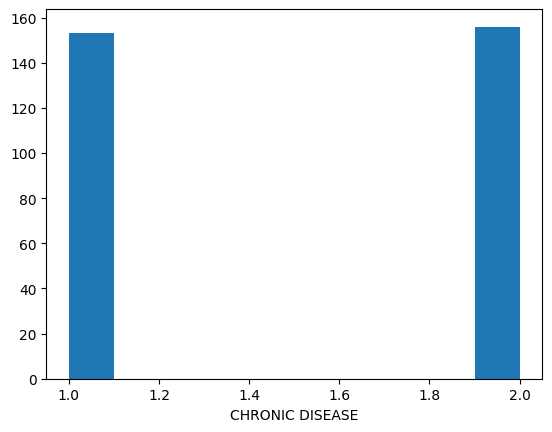

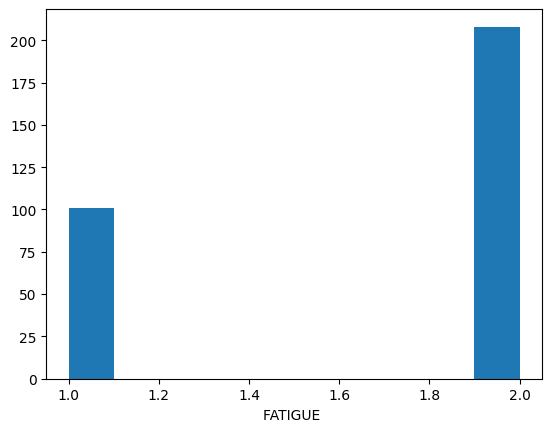

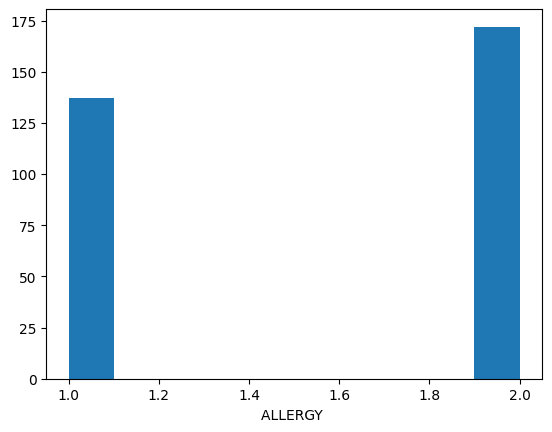

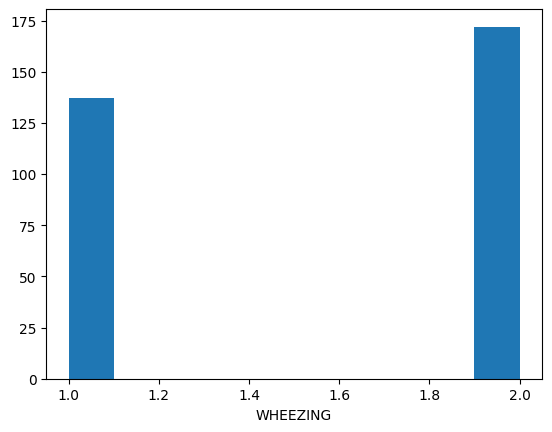

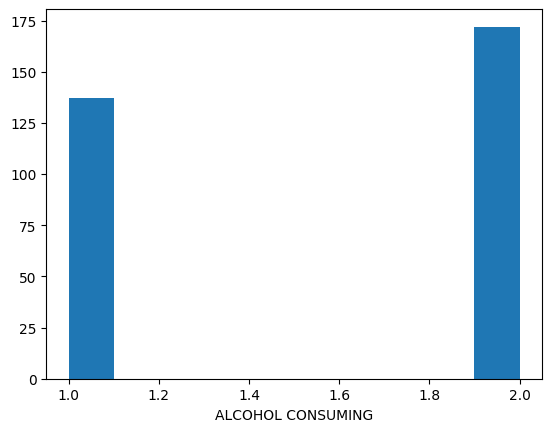

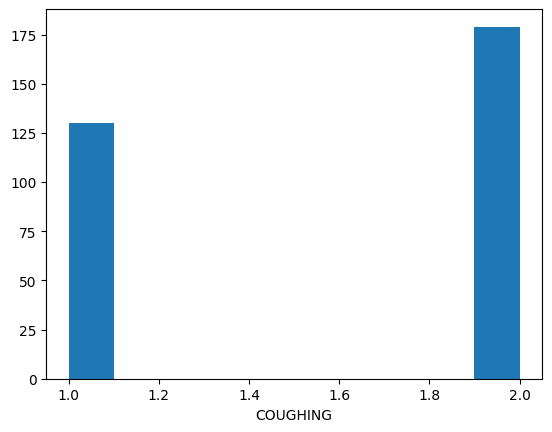

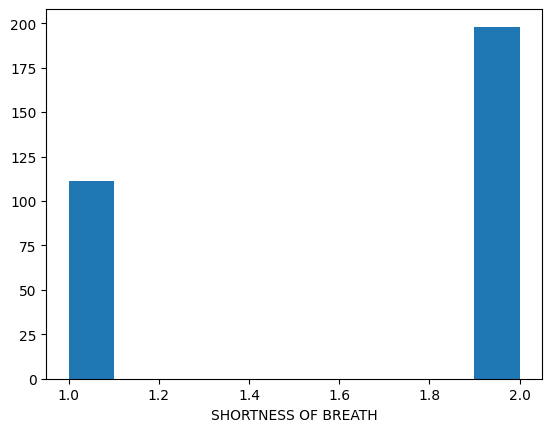

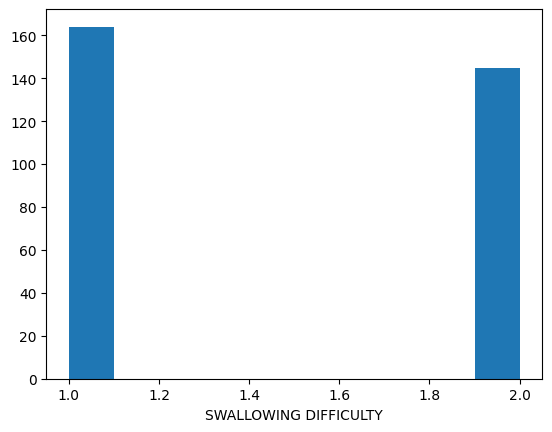

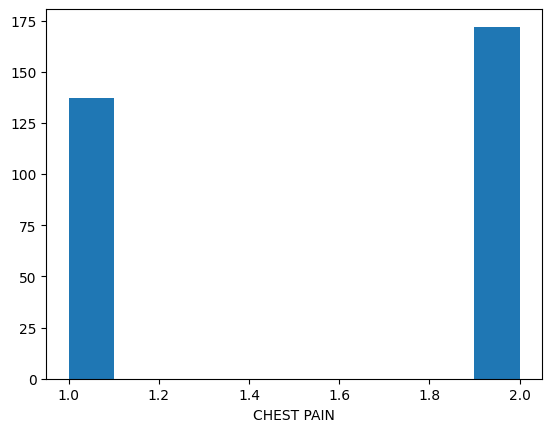

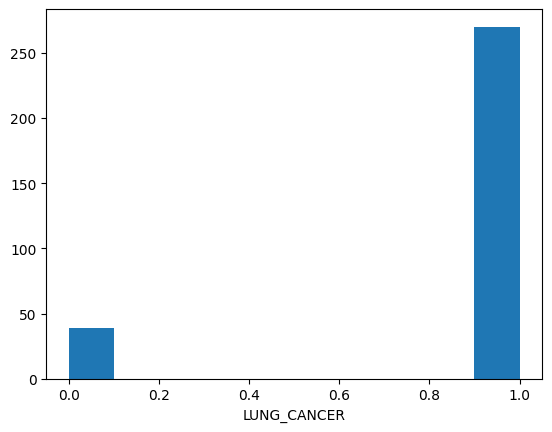

In [7]:
for attre in all_attributes :
    plt.hist(data[attre])
    plt.xlabel(attre)
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y =train_test_split(data[new_all_attributes],data['LUNG_CANCER'],test_size=0.2)
train_y.head()

221    0
186    1
303    1
261    1
298    1
Name: LUNG_CANCER, dtype: int64

In [9]:
from sklearn.svm import SVC
support_vetor = SVC()
support_vetor.fit(train_x,train_y)
pred_y = support_vetor.predict(test_x)

In [10]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
model_result = dict()
model_result['recall'] = recall_score(y_true=test_y,y_pred=pred_y)
model_result['accuracy'] = accuracy_score(y_true=test_y,y_pred=pred_y)
model_result['precision'] = precision_score(y_true=test_y,y_pred=pred_y)

In [15]:
def write_on_file(models_result:dict,model_name:str,description:str):
    """ models result is key value data that should have accuracy ,recall and precision score , should have three keys,'accuracy', 'recall','precision'.
      models_name is name of model that we calculate scores on it descriptio is string who describe model based on it's arugment like how many depth and tree we have in random forest """
    accuracy_score = models_result['accuracy']
    recall_score = models_result['recall']
    precision = models_result['precision']
    with open('models_accuracy_results.txt','a') as file:
        file.write(f'name of model is :\n{model_name}\n')
        file.write(f'with features of {description}\n')
        file.write('and this is model results\n')
        file.write(f'accuracy score is :\n{accuracy_score}\n')
        file.write(f'recall score is :\n{recall_score}\n')
        file.write(f'precision score is :\n{precision}\n')
        file.write('-'*80+'\n')
        file.close()
    

In [49]:
write_on_file(models_result=model_result,model_name='svm',description='nothing iuvtuf uuftfty  ctrctrfuy   rydyutd r dtrdtrd tr trdtrdtr xt extrtrd tr rdtrtyc yu ydcydf yvugif trftyf  yuty dcty yt tuc  c ')

In [44]:
def read_on_file():
   mydata = []
   with open('models_accuracy_results.txt','r') as file:
       data = file.readlines()
       i = 0
       while i < len(data):
            i+=1
            model_name = data[i]
            i+=4
            accuracy_score = data[i]
            i+=2
            recall_score = data[i]
            i+=2 
            precision_score = data[i]
            i+=2
            values = {'accuracy':accuracy_score.strip(),'recall':recall_score.strip(),'precision':precision_score.strip(),'model_name':model_name.strip()}
            mydata.append(values)
       file.close()
       return  mydata
    

In [50]:
data = read_on_file()

In [51]:
print(len(data))

4
